# Detection and Analysis of Potentially Fraudulent Health Care Providers using                                                   Machine Learning

PROBLEM STATEMENT: 
The goal of this project is to " predict the potentially fraudulent providers " based on the claims filed by them. Along with this, we will also discover important variables helpful in detecting the behaviour of potentially fraud providers.Further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.

BUSINESS OBJECTIVES:
-> Misclassification could prove very costly
-> Model Interpretibility is important
-> No strict Latency requirements

MAPPING TO A ML PROBLEM:
-> A Binary Classification Task.
-> Performance Metrics:
    -> Macro F1 Score: There is an imbalance in my class labels(38.1% to 61.9%).A macro f1 score gives equal 
       weightage/importance to each class.
    -> AUC ROC Score: It is scale-invariant and measures how well predictions are ranked, rather than their absolute values.

In [1]:
import warnings 
warnings.filterwarnings("ignore") 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_d_beneficiary = pd.read_csv('health_cs_data/Train_Beneficiarydata-1542865627584.csv')
train_d_inpatient = pd.read_csv('health_cs_data/Train_Inpatientdata-1542865627584.csv')
train_d_outpatient = pd.read_csv('health_cs_data/Train_Outpatientdata-1542865627584.csv')
label_d_data = pd.read_csv('health_cs_data/Train-1542865627584.csv')


print("train_data_beneficiary : ",train_d_beneficiary.shape)
print("train_data_inpatient : ",train_d_inpatient.shape)
print("train_data_outpatient : ",train_d_outpatient.shape)
print("label_data : ",label_d_data.shape)

train_data_beneficiary :  (138556, 25)
train_data_inpatient :  (40474, 30)
train_data_outpatient :  (517737, 27)
label_data :  (5410, 2)


In [3]:
train_d_inpatient.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [4]:
train_d_inpatient.columns.values

array(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6'], dtype=object)

In [5]:
train_d_inpatient.columns.values

array(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6'], dtype=object)

In [6]:
train_d_beneficiary.columns.values

array(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'], dtype=object)

In [7]:
label_d_data.columns.values

array(['Provider', 'PotentialFraud'], dtype=object)

In [4]:
patient_data = pd.merge(train_d_inpatient, train_d_outpatient, left_on = [ col for col in train_d_outpatient.columns if col in train_d_inpatient.columns], \
                    right_on = [ col for col in train_d_outpatient.columns if col in train_d_inpatient.columns], how = 'outer')

In [5]:
patient_data.shape

(558211, 30)

In [6]:
patient_data = pd.merge(patient_data,train_d_beneficiary,how='inner',on='BeneID' ).\
              merge(label_d_data,how='outer',on='Provider')
patient_data.shape

(558211, 55)

In [7]:
patient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,...,2,1,2,2,2,24000,2136,450,200,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2,1,2,2,2,19000,1068,100,20,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,2,1,1,2,2,17000,1068,1050,540,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,1,1,1,1,2,27000,2136,450,160,Yes


In [8]:
patient_data['PotentialFraud'].value_counts()

No     345415
Yes    212796
Name: PotentialFraud, dtype: int64

Calculating percentage missing values

In [215]:
per_miss_values = patient_data.isnull().sum() * 100 / len(patient_data)

In [50]:
per_miss_values

BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.270149
OperatingPhysician                  79.497538
OtherPhysician                      64.218548
AdmissionDt                         92.749337
ClmAdmitDiagnosisCode               73.863109
DeductibleAmtPaid                    0.161050
DischargeDt                         92.749337
DiagnosisGroupCode                  92.749337
ClmDiagnosisCode_1                   1.872589
ClmDiagnosisCode_2                  35.041588
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_4                  70.524407
ClmDiagnosisCode_5                  79.949517
ClmDiagnosisCode_6                  84.881702
ClmDiagnosisCode_7                  88.144805
ClmDiagnosisCode_8                

# EDA

1. Beginning with a simple bar plot to find out the proportion of labels i.e. Potential Fraud being Yes/No(Binary Classification).


-> Analyzing for the complete data which includes inpatients and outpatients. 

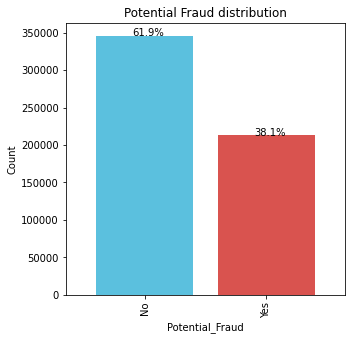

In [37]:
colors_list = ['#5bc0de','#d9534f']
plt.title("Potential Fraud distribution")
ax = patient_data['PotentialFraud'].value_counts().plot(kind='bar', figsize=(5,5), width=0.8,color = colors_list)
total = len(patient_data['PotentialFraud'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)        
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
plt.xlabel('Potential_Fraud')
plt.ylabel('Count')
plt.show()

# Here a simple take is that:
-> There are 38.1% Frauds and 61.9% Non Frauds.
-> This simply means that there are less fraud claims in my data comapared to non fraud claims.

In [38]:
outpatients_ = pd.merge(train_d_outpatient,label_d_data,how='outer',on='Provider')
inpatients_ = pd.merge(train_d_inpatient,label_d_data,how='outer',on='Provider')

-> Analyzing for the inpatients data

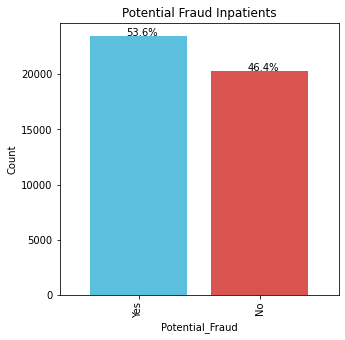

In [39]:
colors_list = ['#5bc0de','#d9534f']
plt.title("Potential Fraud Inpatients")
ax = inpatients_['PotentialFraud'].value_counts().plot(kind='bar', figsize=(5,5), width=0.8,color = colors_list)
total = len(inpatients_['PotentialFraud'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)        
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
plt.xlabel('Potential_Fraud')
plt.ylabel('Count')
plt.show()

In [40]:
inpatients_['PotentialFraud'].value_counts()

Yes    23468
No     20324
Name: PotentialFraud, dtype: int64

###### Here a simple take is that:
-> For inpatients, the frauds are occuring sligtly more.
-> There are 53.6% Frauds and 46.4% Non Frauds.

-> Analyzing for the outpatients data

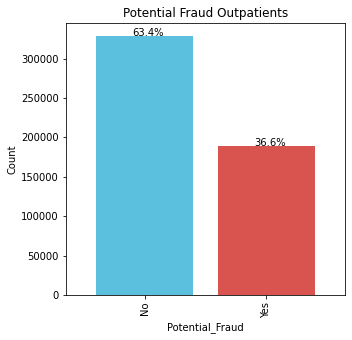

In [41]:
colors_list = ['#5bc0de','#d9534f']
plt.title("Potential Fraud Outpatients")
ax = outpatients_['PotentialFraud'].value_counts().plot(kind='bar', figsize=(5,5), width=0.8,color = colors_list)
total = len(outpatients_['PotentialFraud'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)        
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
plt.xlabel('Potential_Fraud')
plt.ylabel('Count')
plt.show()

In [43]:
outpatients_['PotentialFraud'].value_counts()

No     328697
Yes    189438
Name: PotentialFraud, dtype: int64

###### Here a simple take is that:
-> For outpatients, the number of frauds are less.
-> There are 36.6% Frauds and 63.4% Non Frauds.
->A simple reasoning to these could be the fact that outpatients are not admitted,hence they don't commit frauds. On the other hand inpatients are admitted hence they might want to retreive more money.

2. PHYSICIAN ANALYSIS

So now I'll analyse how physicians who have attended/operated on more/less patients could play a vital role in fraud detection

In [51]:
%matplotlib inline

In [52]:
physician_count = outpatients_['AttendingPhysician'].value_counts().to_dict()
outpatients_['physician_count']=outpatients_['AttendingPhysician'].map(physician_count)

physician_count = inpatients_['AttendingPhysician'].value_counts().to_dict()
inpatients_['physician_count']=inpatients_['AttendingPhysician'].map(physician_count)

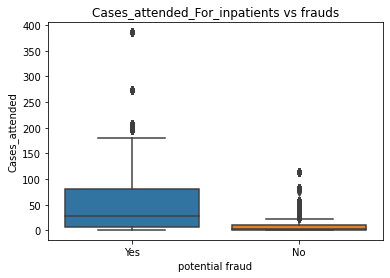

In [53]:
sns.boxplot(x='PotentialFraud',y='physician_count', data=inpatients_)
plt.xlabel('potential fraud')
plt.ylabel('Cases_attended')
plt.title('Cases_attended_For_inpatients vs frauds')
plt.show()

In [54]:
inpatients_['AttendingPhysician'].value_counts().head()

PHY422134    386
PHY341560    274
PHY315112    208
PHY411541    198
PHY431177    195
Name: AttendingPhysician, dtype: int64

What I can figure out from here(Inpatients) is that:
-> Physicians who have attended more patients are more likely to commit fraud.
-> The physicians with ids={PHY422134,PHY341560,PHY315112,PHY411541,PHY431177} have attended the most patients.
-> These physicians will surely be under the scanner for commiting more likely frauds.

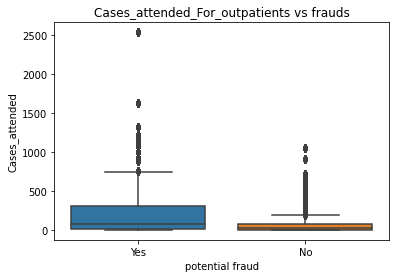

In [55]:
sns.boxplot(x='PotentialFraud',y='physician_count', data=outpatients_)
plt.xlabel('potential fraud')
plt.ylabel('Cases_attended')
plt.title('Cases_attended_For_outpatients vs frauds')
plt.show()

In [56]:
outpatients_['AttendingPhysician'].value_counts().head()

PHY330576    2534
PHY350277    1628
PHY412132    1321
PHY423534    1223
PHY314027    1200
Name: AttendingPhysician, dtype: int64

In [ ]:
What I can figure out from here(Outpatients) is that:
-> Physicians who have attended more patients are more likely to commit fraud.
-> The physicians with ids={PHY330576,PHY350277,PHY412132,PHY423534,PHY314027} have attended the most patients.
-> These physicians will surely be under the scanner for commiting more likely frauds.

In [57]:
from matplotlib import rcParams

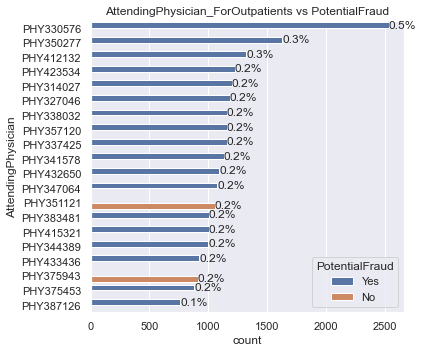

In [199]:
rcParams['figure.figsize'] = 5,5
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='AttendingPhysician',data=outpatients_,hue='PotentialFraud',order = outpatients_['AttendingPhysician'].value_counts().head(20).index)
d1 = outpatients_['AttendingPhysician'].value_counts().to_dict()
s_s1 = sum(list(d1.values()))
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/s_s1)   
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
ax.set_title('AttendingPhysician_ForOutpatients vs PotentialFraud')
plt.show()

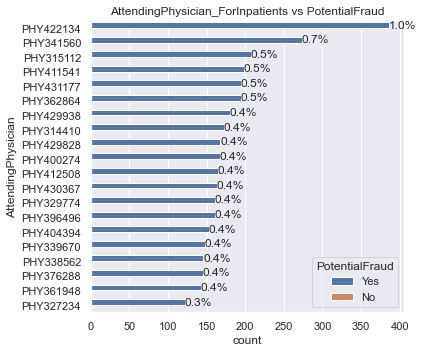

In [200]:
rcParams['figure.figsize'] = 5,5
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='AttendingPhysician',data=inpatients_,hue='PotentialFraud',order = inpatients_['AttendingPhysician'].value_counts().head(20).index)
d1 = inpatients_['AttendingPhysician'].value_counts().to_dict()
s_s1 = sum(list(d1.values()))
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/s_s1)   
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
ax.set_title('AttendingPhysician_ForInpatients vs PotentialFraud')
plt.show()

Its a non-brainer that this feature 'physician_count' could be a very crucial one.
-> Secondly the above countplots clearly show that physicians with maximum attented cases are likely to commit frauds.
1. attending_physician_count could be a very crucial feature as:
-> The physicians who have attended more patients are likely doing more frauds as evident from countplots.
-> Top 5 physicians with most attended cases for Inpatients;  
                    PHY422134    386
                    PHY341560    274
                    PHY315112    208
                    PHY411541    198
                    PHY431177    195
                    
-> Top 5 physicians with most attended cases for Outpatients;  
                    PHY330576    2534
                    PHY350277    1628
                    PHY412132    1321
                    PHY423534    1223
                    PHY314027    1200

In [62]:
outpatients_['OperatingPhysician'].value_counts().head()

PHY330576    424
PHY424897    293
PHY314027    256
PHY423534    250
PHY357120    249
Name: OperatingPhysician, dtype: int64

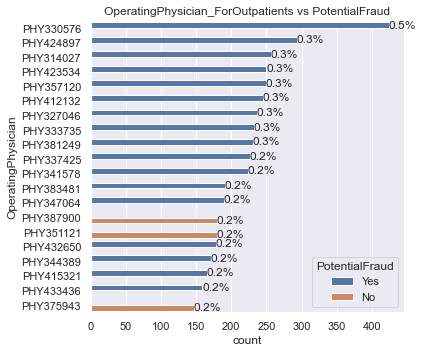

In [202]:
rcParams['figure.figsize'] = 5,5
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='OperatingPhysician',data=outpatients_,hue='PotentialFraud',order = outpatients_['OperatingPhysician'].value_counts().head(20).index)
d1 = outpatients_['OperatingPhysician'].value_counts().to_dict()
s_s1 = sum(list(d1.values()))
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/s_s1)   
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
ax.set_title('OperatingPhysician_ForOutpatients vs PotentialFraud')
plt.show()

In [64]:
inpatients_['OperatingPhysician'].value_counts().head()

PHY429430    225
PHY341560    153
PHY411541    121
PHY352941    110
PHY314410    109
Name: OperatingPhysician, dtype: int64

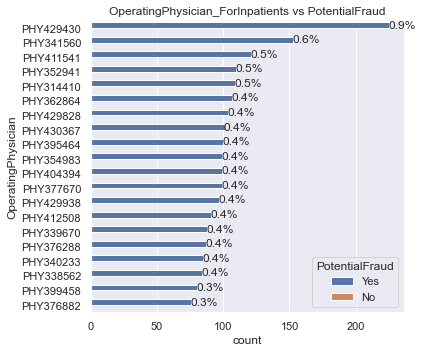

In [203]:
rcParams['figure.figsize'] = 5,5
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='OperatingPhysician',data=inpatients_,hue='PotentialFraud',order = inpatients_['OperatingPhysician'].value_counts().head(20).index)
d1 = inpatients_['OperatingPhysician'].value_counts().to_dict()
s_s1 = sum(list(d1.values()))
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/s_s1)   
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
ax.set_title('OperatingPhysician_ForInpatients vs PotentialFraud')
plt.show()

Again these plots indicate that:
1. operating_physician_count could also be a very crucial feature as:
-> The physicians who have operated on more patients are likely doing more frauds as evident from countplots.
-> Top 5 physicians with most operated cases for Inpatients;  
                    PHY429430    225 
                    PHY341560    153
                    PHY411541    121       
                    PHY352941    110
                    PHY314410    109
                    
-> Top 5 physicians with most operated cases for Outpatients;  
                    PHY330576    424
                    PHY424897    293
                    PHY314027    256
                    PHY423534    250
                    PHY357120    249

2. PROVIDER ANALYSIS

In [70]:
provider_count = outpatients_['Provider'].value_counts().to_dict()
outpatients_['Provider_Count']=outpatients_['Provider'].map(provider_count)
provider_count = inpatients_['Provider'].value_counts().to_dict()
inpatients_['Provider_Count']=inpatients_['Provider'].map(provider_count)

A conclusive boxplot analysis

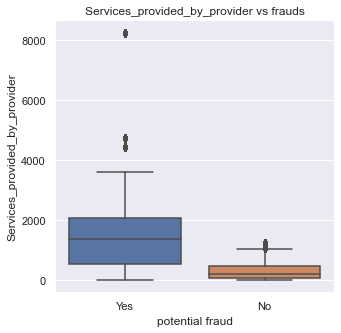

In [67]:
sns.boxplot(x='PotentialFraud',y='Provider_Count', data=outpatients_)
plt.xlabel('potential fraud')
plt.ylabel('Services_provided_by_provider')
plt.title('Services_provided_by_provider vs frauds')
plt.show()

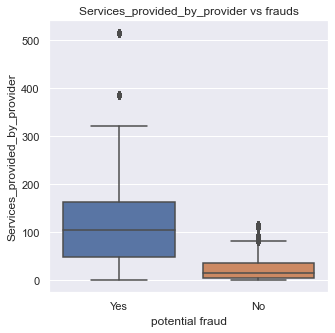

In [68]:
sns.boxplot(x='PotentialFraud',y='Provider_Count', data=inpatients_)
plt.xlabel('potential fraud')
plt.ylabel('Services_provided_by_provider')
plt.title('Services_provided_by_provider vs frauds')
plt.show()

It is evident from these 2 plots that:
-> Providers who have provided more services, are more likely to commit fraud.
-> These providers will surely be under the scanner for commiting more likely frauds.

In [54]:
outpatients_['Provider'].value_counts().head()

PRV51459    8240
PRV53797    4739
PRV51574    4444
PRV53918    3588
PRV54895    3433
Name: Provider, dtype: int64

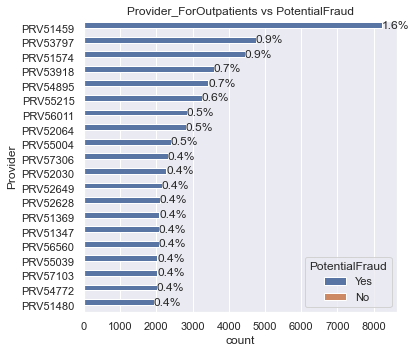

In [205]:
rcParams['figure.figsize'] = 5,5
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='Provider',data=outpatients_,hue='PotentialFraud',order = outpatients_['Provider'].value_counts().head(20).index)
d1 = outpatients_['Provider'].value_counts().to_dict()
s_s1 = sum(list(d1.values()))
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/s_s1)   
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
ax.set_title('Provider_ForOutpatients vs PotentialFraud')
plt.show()

In [56]:
inpatients_['Provider'].value_counts().head()

PRV52019    516
PRV55462    386
PRV54367    322
PRV53706    282
PRV55209    275
Name: Provider, dtype: int64

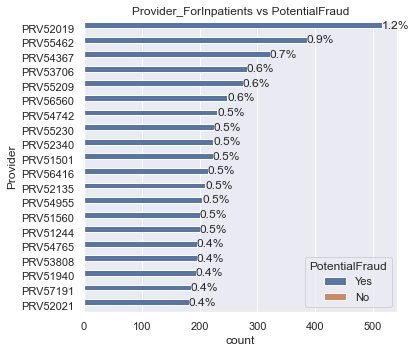

In [204]:
rcParams['figure.figsize'] = 5,5
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='Provider',data=inpatients_,hue='PotentialFraud',order = inpatients_['Provider'].value_counts().head(20).index)
d1 = inpatients_['Provider'].value_counts().to_dict()
s_s1 = sum(list(d1.values()))
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/s_s1)   
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
ax.set_title('Provider_ForInpatients vs PotentialFraud')
plt.show()

In [ ]:
The plots indicate that:
1. provider_count could be a very crucial feature (more than physician_count) as:
-> There is a clear demarcation in determining the fact that top 20 providers whether for inpatients or outpatients have all commited frauds.
-> Top 5 providers with most provided services for Inpatients;  
                    PRV52019    516
                    PRV55462    386
                    PRV54367    322
                    PRV53706    282
                    PRV55209    275
                    
-> Top 5 providers with most provided services for Outpatients;  
                    PRV51459    8240
                    PRV53797    4739
                    PRV51574    4444
                    PRV53918    3588
                    PRV54895    3433
                    
-> In physician_counts some of the top physicians did not commit fraud, but here all have commitedd fraud.

3. Beneficiary analysis


Boxplot Analysis

In [59]:
outpatients_['BeneID'].value_counts().head()

BENE42721     29
BENE118316    29
BENE143400    27
BENE63544     27
BENE59303     27
Name: BeneID, dtype: int64

In [69]:
beneid_count = outpatients_['BeneID'].value_counts().to_dict()
outpatients_['id_Count']=outpatients_['BeneID'].map(beneid_count)
beneid_count = inpatients_['BeneID'].value_counts().to_dict()
inpatients_['id_Count']=inpatients_['BeneID'].map(beneid_count)

<IPython.core.display.Javascript object>


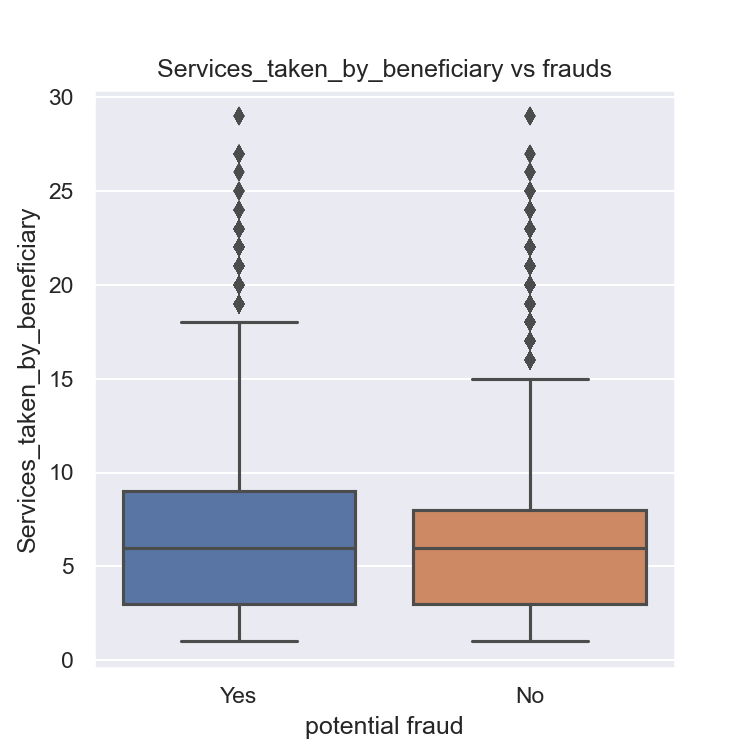

In [61]:
sns.boxplot(x='PotentialFraud',y='id_Count', data=outpatients_)
plt.xlabel('potential fraud')
plt.ylabel('Services_taken_by_beneficiary')
plt.title('Services_taken_by_beneficiary vs frauds')
plt.show()

<IPython.core.display.Javascript object>


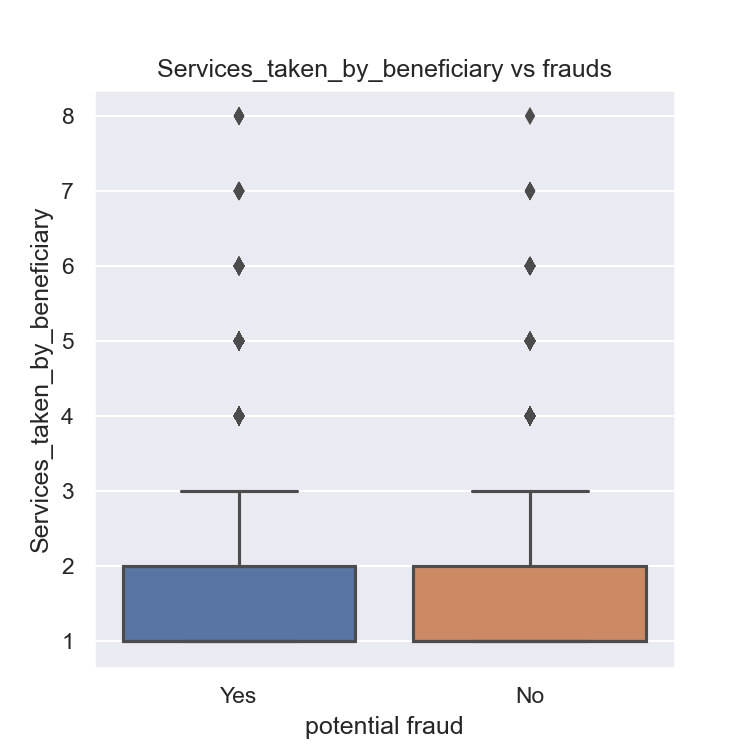

In [62]:
sns.boxplot(x='PotentialFraud',y='id_Count', data=inpatients_)
plt.xlabel('potential fraud')
plt.ylabel('Services_taken_by_beneficiary')
plt.title('Services_taken_by_beneficiary vs frauds')
plt.show()

From here we observe the following:
1. Unlike the provider or physician count, here there is no substancial clarity as to whether a beneficiary with more claims  taken has done a fraud. 
2. This means this is not a very good feature but surely will play some role.

Usage of percentage in beneficiary analysis isn't a good idea pertaining to the fact that the result would be a very small value. So a count gives better gist of what's happening.

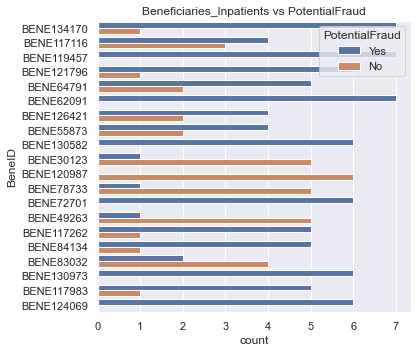

In [208]:
rcParams['figure.figsize'] = 5,5
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='BeneID',data=inpatients_,hue='PotentialFraud',order = inpatients_['BeneID'].value_counts().head(20).index)
ax.set_title('Beneficiaries_Inpatients vs PotentialFraud')
plt.show()

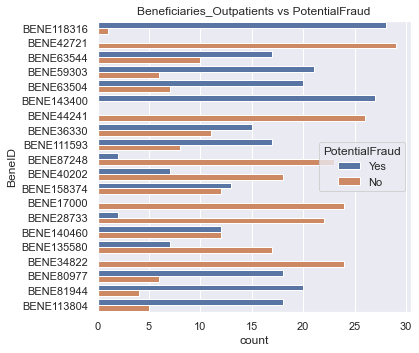

In [214]:
rcParams['figure.figsize'] = 5,5
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='BeneID',data=outpatients_,hue='PotentialFraud',order = outpatients_['BeneID'].value_counts().head(20).index)
ax.set_title('Beneficiaries_Outpatients vs PotentialFraud')
plt.show()

In [ ]:
What we observe from these 2 plots is that:
    1. For beneficiaries(Inpatients) who have seeked more claims or have a higher count, are more likely to commit frauds.
    2. For beneficiaries(Outpatients) who have seeked more claims or have a higher count, there is no substaincial information to conclude anything.

Here I'll do an analysis using Pointplot.

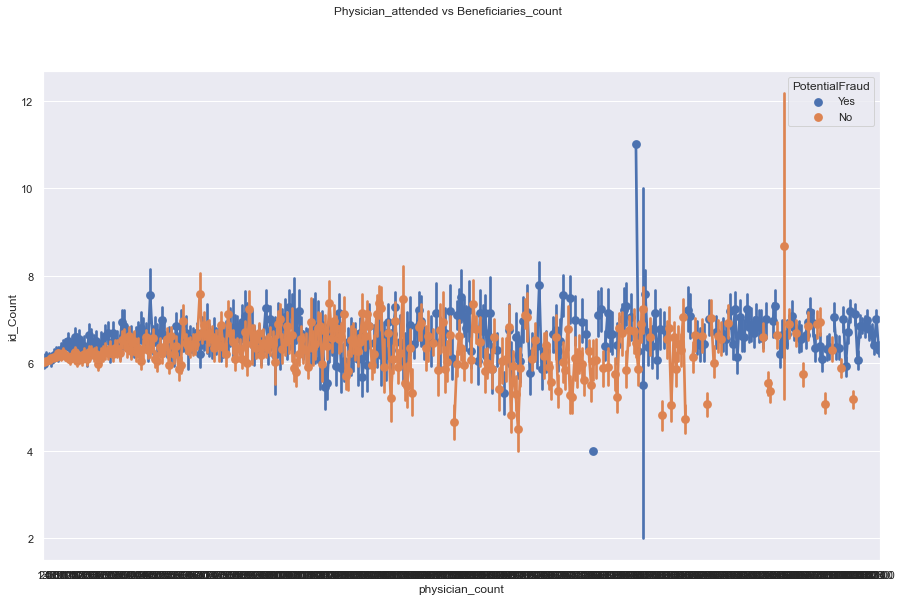

In [83]:
plt.figure(figsize=(15, 9))
sns.pointplot(x = outpatients_.physician_count, y = outpatients_.id_Count,hue=outpatients_.PotentialFraud)
plt.suptitle('Physician_attended vs Beneficiaries_count\n')
plt.show()

It is evident from the plots(Outpatients) that:
1. Physicians who have attended more cases have most likely done frauds.

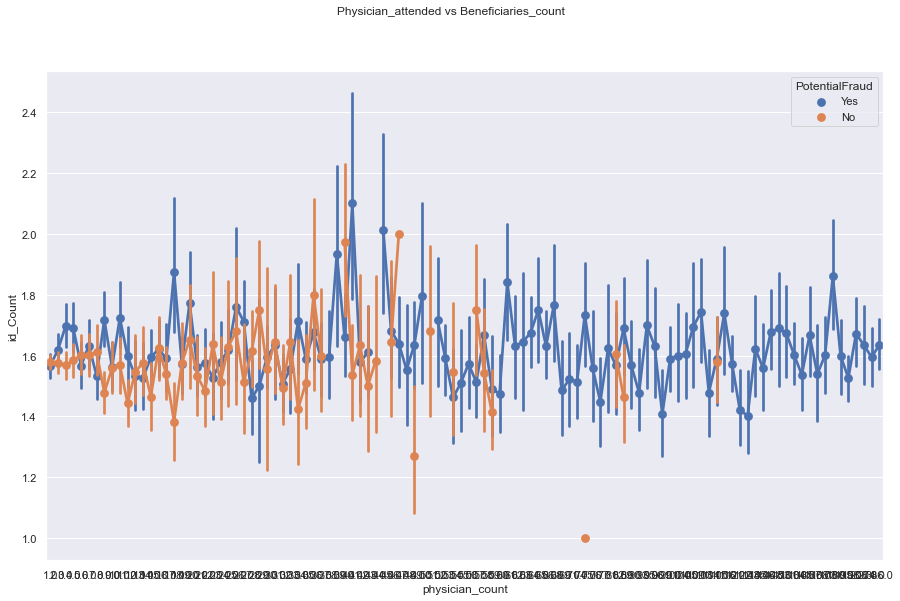

In [85]:
plt.figure(figsize=(15, 9))
sns.pointplot(x = inpatients_.physician_count, y = inpatients_.id_Count,hue=inpatients_.PotentialFraud)
plt.suptitle('Physician_attended vs Beneficiaries_count\n')
plt.show()

It is evident from the plots(Inpatients) that:
1. Physicians who have attended more cases have most likely done frauds.
2. Quite conclusively it shows that the beneficiaries being less or high doesn't affect our analysis that a high physician 
   count leads to more fraud claims.


    3.2 Age and gender analysis of beneficiary

In [89]:
inpatient_data = pd.merge(inpatients_,train_d_beneficiary,how='inner',on='BeneID' )
outpatient_data = pd.merge(outpatients_,train_d_beneficiary,how='inner',on='BeneID' )

In [91]:
inpatient_data['Admission_Date'] = pd.to_datetime(inpatient_data['AdmissionDt'] , format = '%Y-%m-%d')
inpatient_data['Discharge_Date'] = pd.to_datetime(inpatient_data['DischargeDt'],format = '%Y-%m-%d')

inpatient_data['ClaimStart_Date'] = pd.to_datetime(inpatient_data['ClaimStartDt'] , format = '%Y-%m-%d')
inpatient_data['ClaimEnd_Date'] = pd.to_datetime(inpatient_data['ClaimEndDt'],format = '%Y-%m-%d')

inpatient_data['DOB'] = pd.to_datetime(inpatient_data['DOB'] , format = '%Y-%m-%d')
inpatient_data['DOD'] = pd.to_datetime(inpatient_data['DOD'],format = '%Y-%m-%d')
inpatient_data['Age'] = round(((inpatient_data['ClaimStart_Date'] - inpatient_data['DOB']).dt.days + 1)/365.25)

In [92]:
age_count = inpatient_data['Age'].value_counts().to_dict()
inpatient_data['Age_Count']=inpatient_data['Age'].map(age_count)

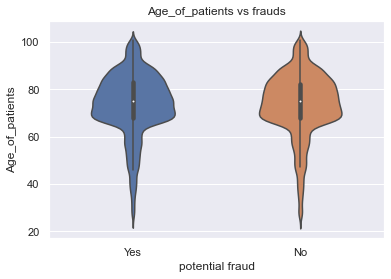

In [94]:
sns.violinplot(x='PotentialFraud',y='Age', data=inpatient_data,width=0.5)
plt.xlabel('potential fraud')
plt.ylabel('Age_of_patients')
plt.title('Age_of_patients vs frauds')
plt.show()

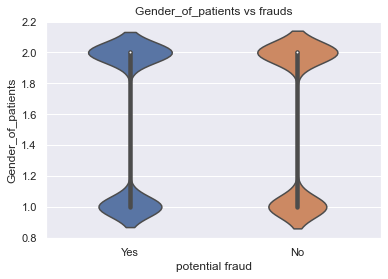

In [100]:
sns.violinplot(x='PotentialFraud',y='Gender', data=inpatient_data,width=0.5)
plt.xlabel('potential fraud')
plt.ylabel('Gender_of_patients')
plt.title('Gender_of_patients vs frauds')
plt.show()

In [95]:
outpatient_data['ClaimStart_Date'] = pd.to_datetime(outpatient_data['ClaimStartDt'] , format = '%Y-%m-%d')
outpatient_data['ClaimEnd_Date'] = pd.to_datetime(outpatient_data['ClaimEndDt'],format = '%Y-%m-%d')

outpatient_data['DOB'] = pd.to_datetime(outpatient_data['DOB'] , format = '%Y-%m-%d')
outpatient_data['DOD'] = pd.to_datetime(outpatient_data['DOD'],format = '%Y-%m-%d')
outpatient_data['Age'] = round(((outpatient_data['ClaimStart_Date'] - outpatient_data['DOB']).dt.days + 1)/365.25)

In [96]:
age_count = outpatient_data['Age'].value_counts().to_dict()
outpatient_data['Age_Count']=outpatient_data['Age'].map(age_count)

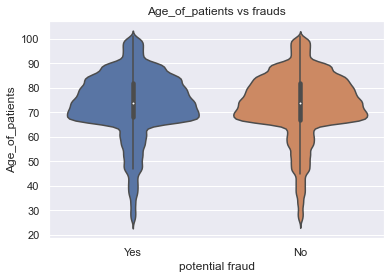

In [98]:
sns.violinplot(x='PotentialFraud',y='Age', data=outpatient_data)
plt.xlabel('potential fraud')
plt.ylabel('Age_of_patients')
plt.title('Age_of_patients vs frauds')
plt.show()

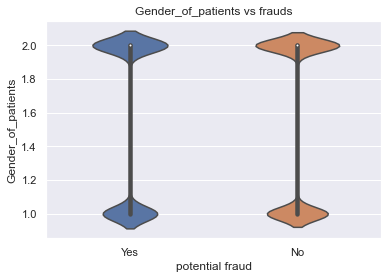

In [101]:
sns.violinplot(x='PotentialFraud',y='Gender', data=outpatient_data,width=0.5)
plt.xlabel('potential fraud')
plt.ylabel('Gender_of_patients')
plt.title('Gender_of_patients vs frauds')
plt.show()

In [225]:
outpatient_data["age_group"]=pd.cut(outpatient_data.Age, [30,40,50,60,70,80,90,100])
inpatient_data["age_group"]=pd.cut(inpatient_data.Age, [30,40,50,60,70,80,90,100])

In [226]:
fraud_count = outpatient_data['PotentialFraud'].value_counts().to_dict()
outpatient_data['fraud_Count']=outpatient_data['PotentialFraud'].map(age_count)

In [227]:
s1 = inpatient_data['Gender'].value_counts()
s_s1 = sum(s1.tolist())

s2 = outpatient_data['Gender'].value_counts()
s_s2 = sum(s2.tolist())

Gender        1     2
age_group            
(30, 40]    413   375
(40, 50]    826   821
(50, 60]   1324  1372
(60, 70]   4083  4908
(70, 80]   5944  7619
(80, 90]   3762  6136
(90, 100]   698  1874


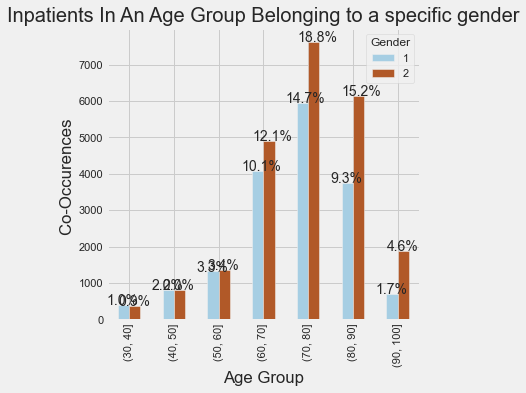

In [230]:
plt.style.use('fivethirtyeight')
counts = inpatient_data.groupby(['age_group', 'Gender']).Age.count().unstack()
print(counts)

ax = counts.plot(kind='bar',stacked = False, colormap = 'Paired')
total = s_s1
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

plt.xlabel ('Age Group')
plt.ylabel ('Co-Occurences ')
plt.title('Inpatients In An Age Group Belonging to a specific gender',fontsize=20)
plt.show()

Gender         1       2
age_group               
(30, 40]    5370    5254
(40, 50]   10134   10740
(50, 60]   16318   17759
(60, 70]   53829   66316
(70, 80]   77220  100639
(80, 90]   45088   75230
(90, 100]   8085   21735


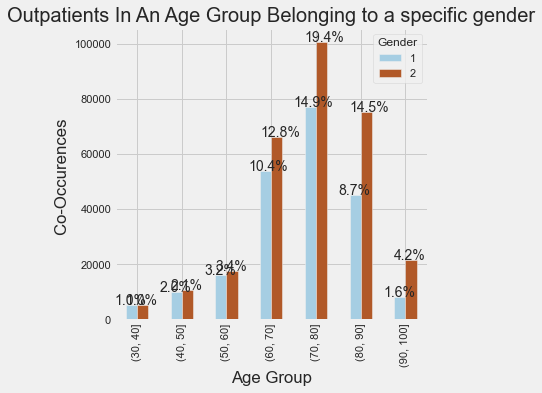

In [231]:
plt.style.use('fivethirtyeight')
counts = outpatient_data.groupby(['age_group', 'Gender']).Age.count().unstack()
print(counts)

ax = counts.plot(kind='bar',stacked = False, colormap = 'Paired')
total = s_s2
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

plt.xlabel ('Age Group')
plt.ylabel ('Co-Occurences ')
plt.title('Outpatients In An Age Group Belonging to a specific gender',fontsize=20)
plt.show()

In [167]:
s1 = inpatient_data['PotentialFraud'].value_counts()
s_s1 = sum(s1.tolist())

s2 = outpatient_data['PotentialFraud'].value_counts()
s_s2 = sum(s2.tolist())

PotentialFraud      No    Yes
agegrp                       
(30, 40]          6828   3796
(40, 50]         13375   7499
(50, 60]         22030  12047
(60, 70]         76394  43751
(70, 80]        112710  65149
(80, 90]         75902  44416
(90, 100]        18585  11235


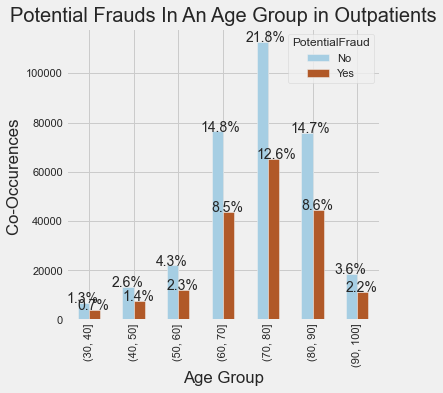

In [232]:
plt.style.use('fivethirtyeight')
counts = outpatient_data.groupby(['age_group', 'PotentialFraud']).Age.count().unstack()
print(counts)

ax = counts.plot(kind='bar',stacked = False, colormap = 'Paired')
total = s_s2
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

plt.xlabel ('Age Group')
plt.ylabel ('Co-Occurences ')
plt.title('Potential Frauds In An Age Group in Outpatients',fontsize=20)
plt.show()

PotentialFraud    No   Yes
age_group                 
(30, 40]         340   448
(40, 50]         691   956
(50, 60]        1115  1581
(60, 70]        3819  5172
(70, 80]        5642  7921
(80, 90]        4234  5664
(90, 100]       1077  1495


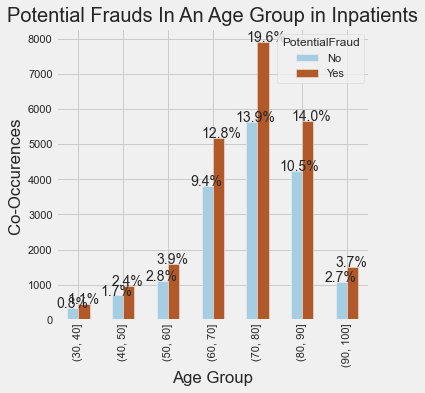

In [233]:
plt.style.use('fivethirtyeight')
counts = inpatient_data.groupby(['age_group', 'PotentialFraud']).Age.count().unstack()
print(counts)

ax = counts.plot(kind='bar',stacked = False, colormap = 'Paired')
total = s_s1
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

plt.xlabel ('Age Group')
plt.ylabel ('Co-Occurences ')
plt.title('Potential Frauds In An Age Group in Inpatients',fontsize=20)
plt.show()

A simple takeaway from my 'age' analysis is that:
 1. More/Less age is not a parameter to decide whether a fraud is likely to be commmited or not
 2. Our grouped bar plots show that:
 -> 70-80 age group is commonly found.
 -> Within 70-80 age group, more frauds happen for inpatients whereas less frauds for outpatients.

    3.3 Number of days it took to get the claim

In [77]:
inpatient_data['Claim_Days'] = ((inpatient_data['ClaimEnd_Date'] - inpatient_data['ClaimStart_Date']).dt.days) + 1 
outpatient_data['Claim_Days'] = ((outpatient_data['ClaimEnd_Date'] - outpatient_data['ClaimStart_Date']).dt.days) + 1

In [78]:
outpatient_data['Claim_Days'].value_counts().head()

1     453348
21     24312
2      11960
3       4366
15      2735
Name: Claim_Days, dtype: int64

<IPython.core.display.Javascript object>


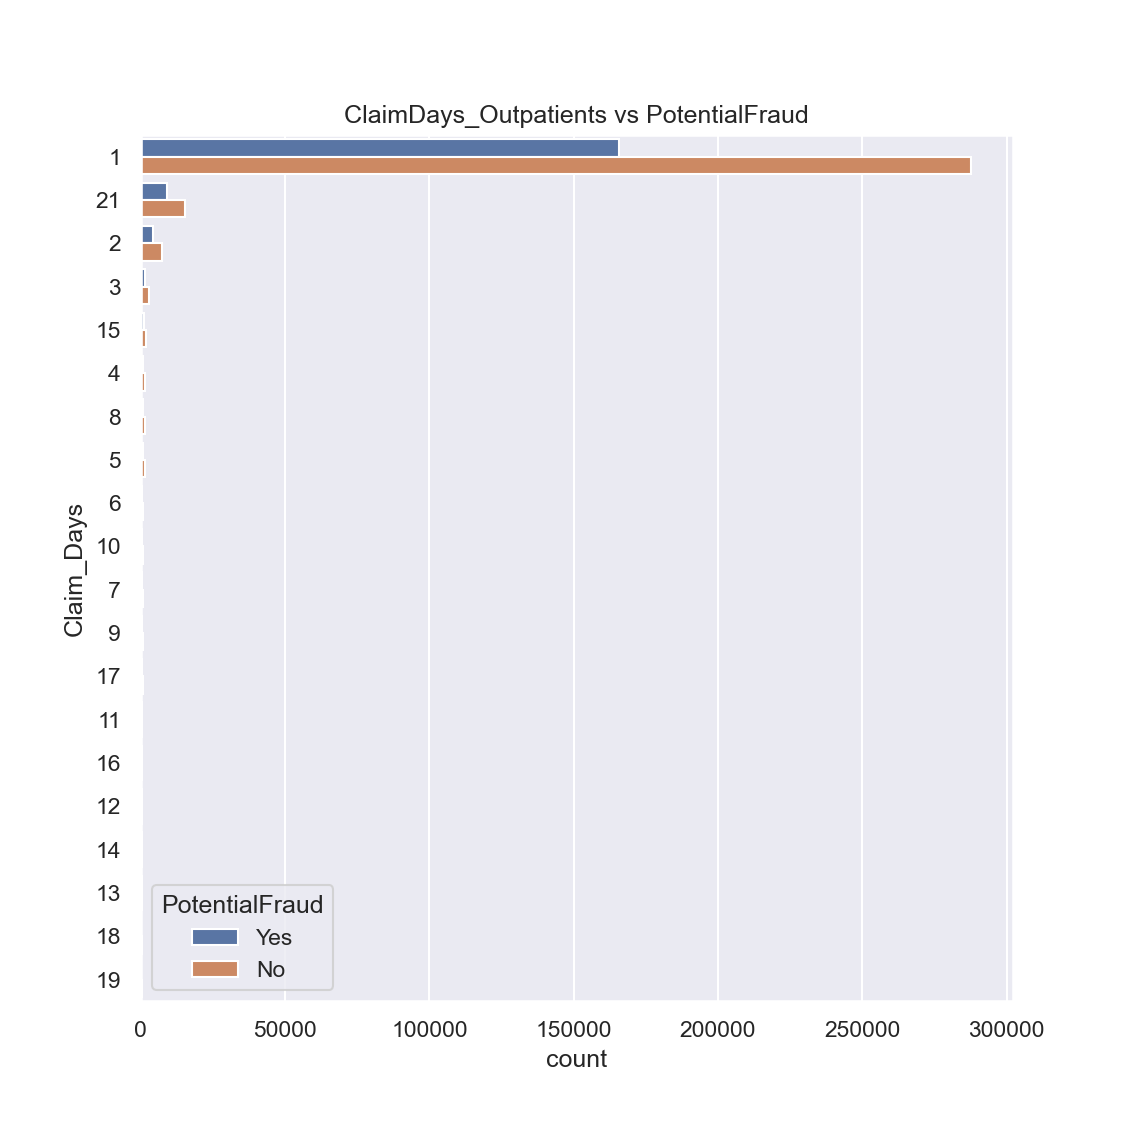

In [80]:
rcParams['figure.figsize'] = 5,5
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='Claim_Days',data=outpatient_data,hue='PotentialFraud',order = outpatient_data['Claim_Days'].value_counts().head(20).index)
ax.set_title('ClaimDays_Outpatients vs PotentialFraud')
plt.show()

In [82]:
inpatient_data['Claim_Days'].value_counts().head()

4    6899
3    6119
5    4993
2    4599
6    3579
Name: Claim_Days, dtype: int64

<IPython.core.display.Javascript object>


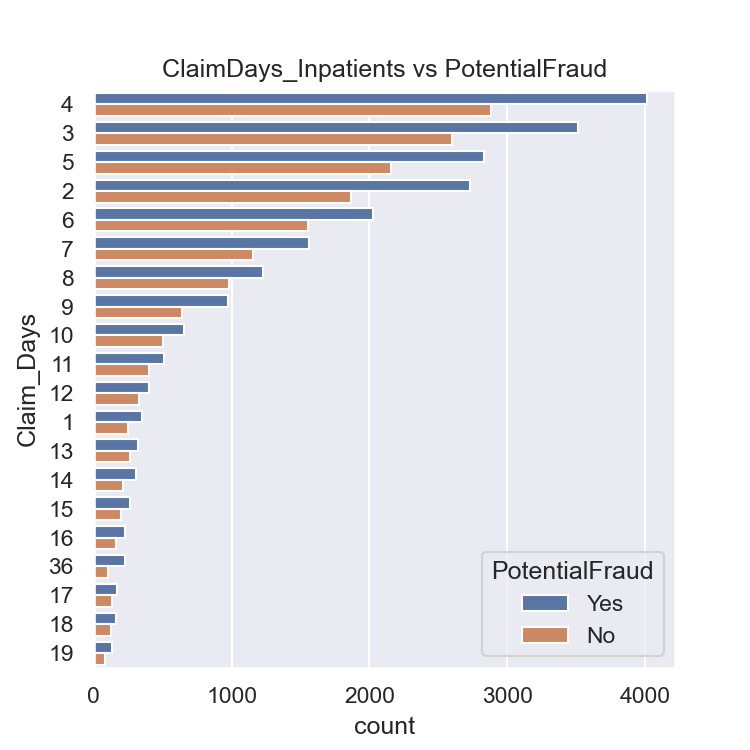

In [83]:
rcParams['figure.figsize'] = 5,5
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='Claim_Days',data=inpatient_data,hue='PotentialFraud',order = inpatient_data['Claim_Days'].value_counts().head(20).index)
ax.set_title('ClaimDays_Inpatients vs PotentialFraud')
plt.show()

In [ ]:
The plots indicate that:
1. ClaimDays_count could be a very crucial feature as:
-> For outpatients,top 5 days it took and the count of beneficiaries who got it it that duration
   Days    Frequency of occurence
    1     453348
    21     24312
    2      11960
    3       4366
    15      2735
-> For inpatients,top 5 days it took and the count of beneficiaries who got it it that duration
   Days   Frequency of occurence
    4    6899
    3    6119
    5    4993
    2    4599
    6    3579
                    
-> From the outpatients countplot it is evident that mojority claims just took 1 day. Most of these were non frauds.
-> From inpatients countplot it is evident that most claims took an average of 4 to 9 days with some of them being frauds and rest non frauds.

    3.4 Number of Hospitalization days for Inpatients

In [174]:
inpatient_data['Admission_Date'] = pd.to_datetime(inpatient_data['AdmissionDt'] , format = '%Y-%m-%d')
inpatient_data['Discharge_Date'] = pd.to_datetime(inpatient_data['DischargeDt'],format = '%Y-%m-%d')
inpatient_data['Admission_Days'] = ((inpatient_data['Discharge_Date'] - inpatient_data['Admission_Date']).dt.days) + 1
inpatient_data['Admission_Days'].value_counts().head()

4    6902
3    6117
5    4994
2    4591
6    3579
Name: Admission_Days, dtype: int64

<IPython.core.display.Javascript object>


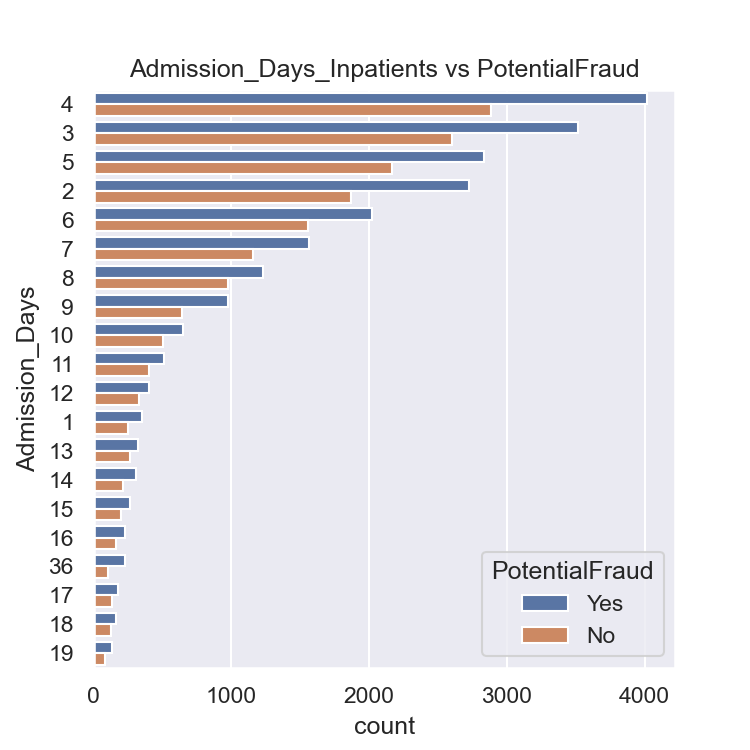

In [88]:
rcParams['figure.figsize'] = 5,5
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='Admission_Days',data=inpatient_data,hue='PotentialFraud',order = inpatient_data['Admission_Days'].value_counts().head(20).index)
ax.set_title('Admission_Days_Inpatients vs PotentialFraud')
plt.show()

In [ ]:
-> For inpatients,top 5 days they were hospitalized and the count of beneficiaries who got hospitalized
   Days    Count
    4    6902
    3    6117
    5    4994
    2    4591
    6    3579
-> There is a slight acceptance of the fact that people who got hospitalized for these days have commited frauds.

    3.5 Analysis on Race,State and Country of Patients

In [117]:
patient_data['Race'].value_counts()

1    471036
2     55640
3     19715
5     11820
Name: Race, dtype: int64

<IPython.core.display.Javascript object>


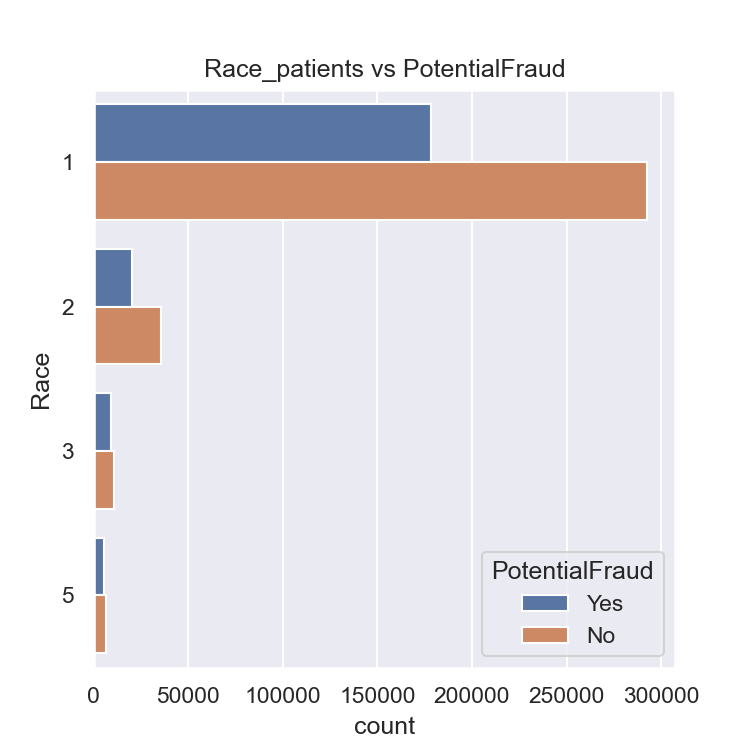

In [90]:
rcParams['figure.figsize'] = 5,5
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='Race',data=patient_data,hue='PotentialFraud',order = patient_data['Race'].value_counts().head().index)
ax.set_title('Race_patients vs PotentialFraud')
plt.show()

It is clear that:
1. Majority patients belong to race 1.
2. Among Patients belonging to race 1,around 30k have not commited frauds and about 17k have commited frauds.
3. So 'race' could be an important feature.

<IPython.core.display.Javascript object>


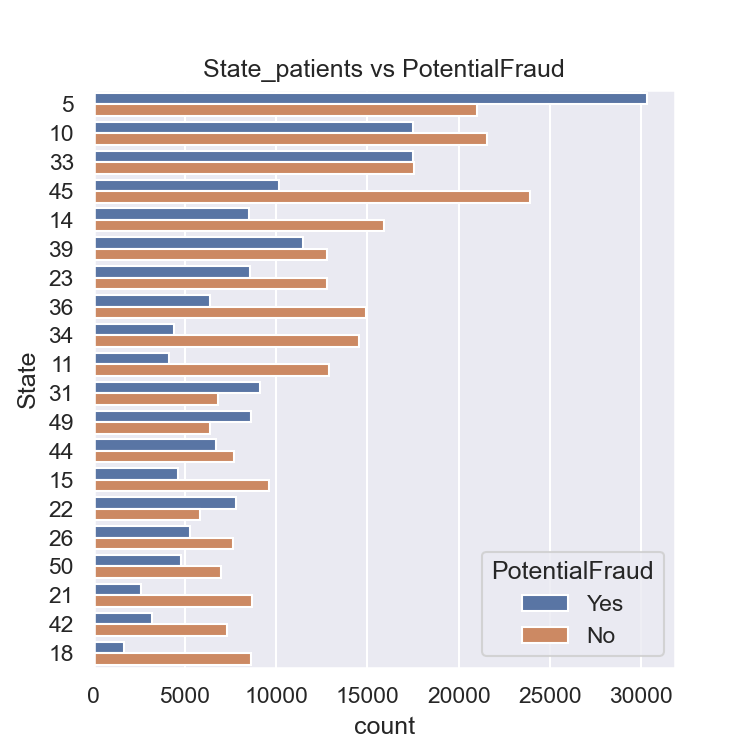

In [91]:
rcParams['figure.figsize'] = 5,5
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='State',data=patient_data,hue='PotentialFraud',order = patient_data['State'].value_counts().head(20).index)
ax.set_title('State_patients vs PotentialFraud')
plt.show()

In [93]:
patient_data['State'].value_counts().head(5)

5     51350
10    39073
33    35024
45    34022
14    24417
Name: State, dtype: int64

It is clear that: 
1. Top 5 states where people have submitted more claims are: 
States with codes {5,10,33,45,14}
2. So in my countplot it is evident that state 5 is more likely to have more fraud claims.


<IPython.core.display.Javascript object>


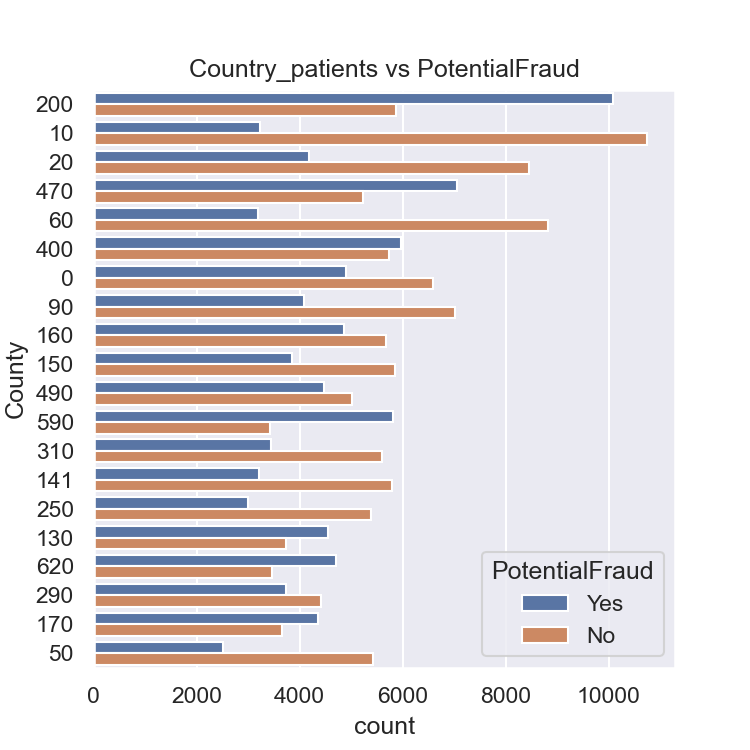

In [92]:
rcParams['figure.figsize'] = 5,5
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='County',data=patient_data,hue='PotentialFraud',order = patient_data['County'].value_counts().head(20).index)
ax.set_title('Country_patients vs PotentialFraud')
plt.show()

In [ ]:
It is clear that: 
1. Top 5 countries where people have submitted more claim requests are: 
Countries with codes {200,10,20,470,60}


4. Analysis on Claim_Amount 

In [94]:
inpatient_data['InscClaimAmtReimbursed'].value_counts().head()

4000.0    4506
5000.0    3996
3000.0    3852
6000.0    3318
7000.0    2837
Name: InscClaimAmtReimbursed, dtype: int64

<IPython.core.display.Javascript object>


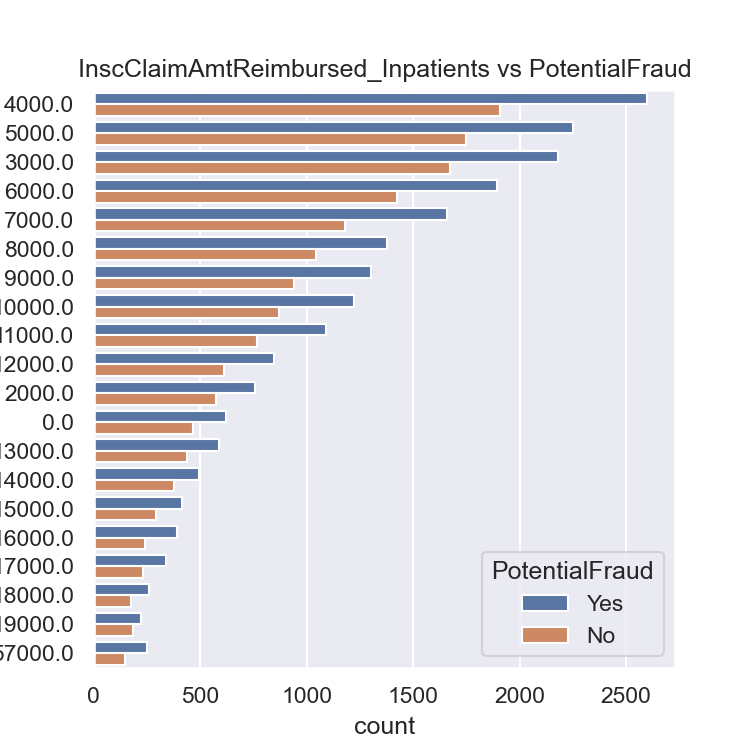

In [96]:
rcParams['figure.figsize'] = 5,5
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='InscClaimAmtReimbursed',data=inpatient_data,hue='PotentialFraud',order = inpatient_data['InscClaimAmtReimbursed'].value_counts().head(20).index)
ax.set_title('InscClaimAmtReimbursed_Inpatients vs PotentialFraud')
plt.show()

In [97]:
outpatient_data['InscClaimAmtReimbursed'].value_counts().head()

100.0    52943
10.0     42461
200.0    41594
60.0     40762
30.0     33919
Name: InscClaimAmtReimbursed, dtype: int64

<IPython.core.display.Javascript object>


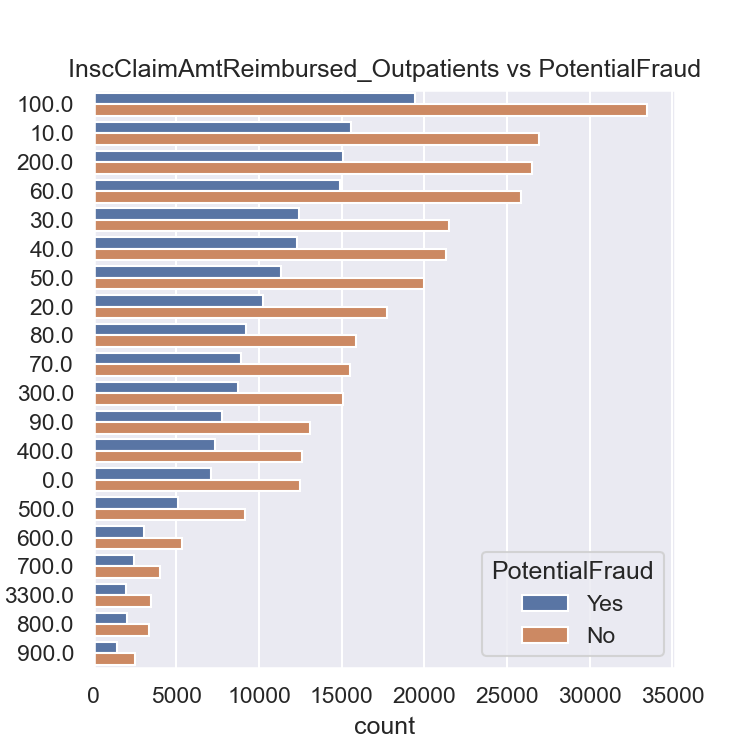

In [98]:
rcParams['figure.figsize'] = 5,5
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='InscClaimAmtReimbursed',data=outpatient_data,hue='PotentialFraud',order = outpatient_data['InscClaimAmtReimbursed'].value_counts().head(20).index)
ax.set_title('InscClaimAmtReimbursed_Outpatients vs PotentialFraud')
plt.show()

In [ ]:
The countplots indicate that:
-> Top 5 InscClaimAmtReimbursed for Inpatients;  
                    Amount    Frequency of occurence
                    4000.0    4506
                    5000.0    3996
                    3000.0    3852
                    6000.0    3318
                    7000.0    2837
                    
-> Top 5 InscClaimAmtReimbursed for Outpatients;  
                    Amount   Frequency of occurence
                    100.0    52943
                    10.0     42461
                    200.0    41594
                    60.0     40762
                    30.0     33919
                    
-> Now a very clear observation from the Inpatients plot is that there is more likely a case of fraud for these amounts.
-> And for outpatients, the chance of not being a fraud is high

Now here is a kernel density estimation plot for a visual look into my above observations

<IPython.core.display.Javascript object>


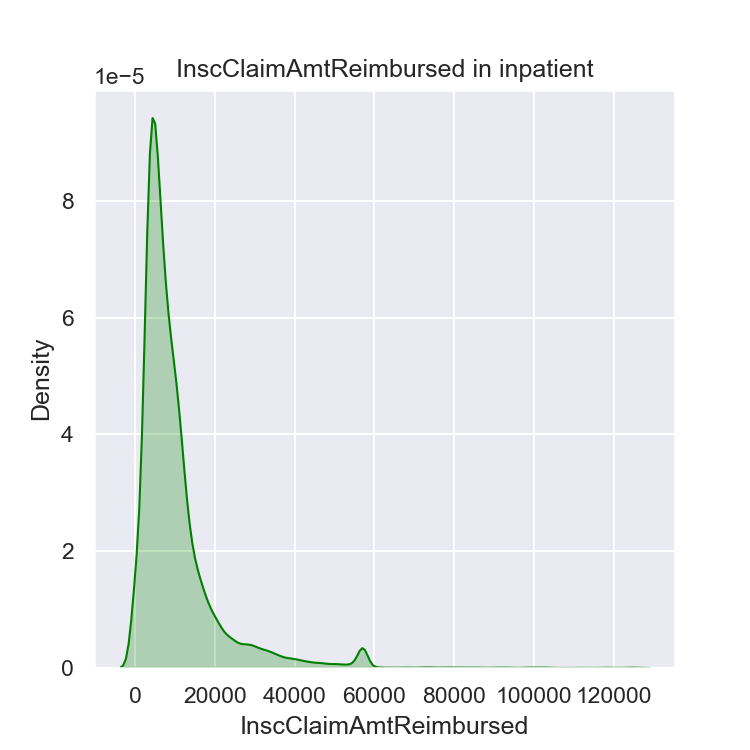

In [99]:
rcParams['figure.figsize'] = 5,5
sns.kdeplot(inpatient_data['InscClaimAmtReimbursed'],shade=True,color='green',legend=False)
plt.title('InscClaimAmtReimbursed in inpatient')
plt.xlabel('InscClaimAmtReimbursed')
plt.show()

<IPython.core.display.Javascript object>


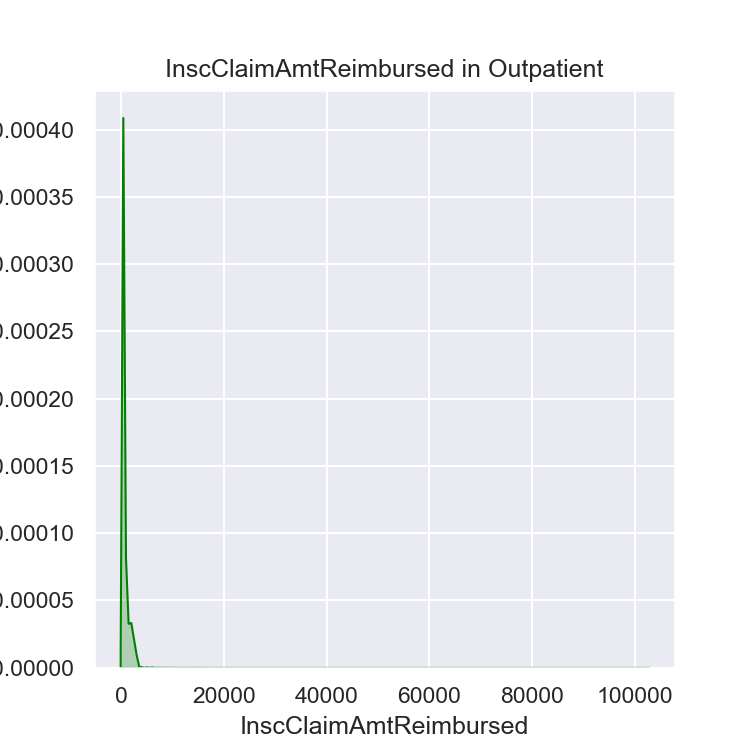

In [101]:
rcParams['figure.figsize'] = 5,5
sns.kdeplot(outpatient_data['InscClaimAmtReimbursed'],shade=True,color='green',legend=False)
plt.title('InscClaimAmtReimbursed in Outpatient')
plt.xlabel('InscClaimAmtReimbursed')
plt.show()

Plots indicate that:
1. For Inpatients, a higher amount is reimbursed compared to outpatients.
2. The reasoning being the fact that inpatients seek more claim due to their hospital expenditure.

In [239]:
s1 = outpatient_data['InscClaimAmtReimbursed'].value_counts()
s_s1 = sum(s1.tolist())
s2 = inpatient_data['InscClaimAmtReimbursed'].value_counts()
s_s2 = sum(s2.tolist())

In [238]:
outpatient_data["amountgrp"]=pd.cut(outpatient_data.InscClaimAmtReimbursed, [0,50,100,200,400,600,800,1000,1500,2000])
inpatient_data["amountgrp"]=pd.cut(inpatient_data.InscClaimAmtReimbursed, [0,2000,4000,6000,8000,10000,12000,14000,16000])

PotentialFraud      No    Yes
amountgrp                    
(0, 50]         107411  61838
(50, 100]       103799  60252
(100, 200]       26885  15297
(200, 400]       27964  16285
(400, 600]       14623   8268
(600, 800]        7433   4470
(800, 1000]       4870   2783
(1000, 1500]      6699   3920
(1500, 2000]      5606   3281


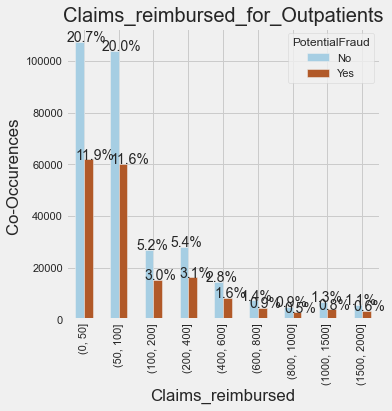

In [241]:
plt.style.use('fivethirtyeight')
counts = outpatient_data.groupby(['amountgrp', 'PotentialFraud']).InscClaimAmtReimbursed.count().unstack()
print(counts)

ax = counts.plot(kind='bar',stacked = False, colormap = 'Paired')
total = s_s1
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

plt.xlabel ('Claims_reimbursed')
plt.ylabel ('Co-Occurences ')
plt.title('Claims_reimbursed_for_Outpatients',fontsize=20)
plt.show()

It is evident that:
-> Relatively claims less than 100 are reimbursed for outpatients.
-> For outpatients more often than not, these are non fraud claims

PotentialFraud    No   Yes
amountgrp                 
(0, 2000]        805  1032
(2000, 4000]    3578  4786
(4000, 6000]    3173  4144
(6000, 8000]    2225  3036
(8000, 10000]   1811  2525
(10000, 12000]  1377  1942
(12000, 14000]   813  1083
(14000, 16000]   532   806


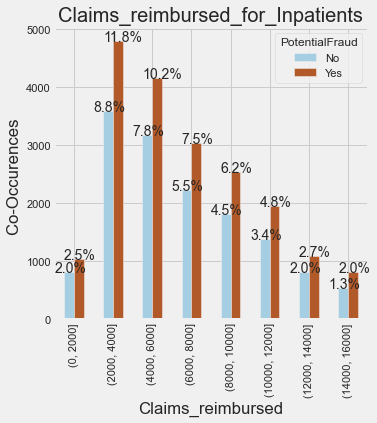

In [242]:
plt.style.use('fivethirtyeight')
counts = inpatient_data.groupby(['amountgrp', 'PotentialFraud']).InscClaimAmtReimbursed.count().unstack()
print(counts)

ax = counts.plot(kind='bar',stacked = False, colormap = 'Paired')
total = s_s2
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

plt.xlabel ('Claims_reimbursed')
plt.ylabel ('Co-Occurences ')
plt.title('Claims_reimbursed_for_Inpatients',fontsize=20)
plt.show()

It is evident that:
-> The majority claims remibursed are in range 2000 to 4000.
-> Claims from 2000 to 12000 are reimbursed quite often.
-> More fraud claims are done here in inpatients.

We can conclude from here that:
1. If the InscClaimAmtReimbursed is less then it is less likely a fraud
2. On the other hand if the amount is more, then chances of fraud increase, though there is an overlap.

5. Procedure Codes and Diagnosis Codes Analysis

In [102]:
patient_df = pd.DataFrame(columns = ['Diagnosis_data'])
patient_df['Diagnosis_data'] = pd.concat([patient_data["ClmDiagnosisCode_1"],patient_data["ClmDiagnosisCode_2"],patient_data["ClmDiagnosisCode_3"],patient_data["ClmDiagnosisCode_4"],patient_data["ClmDiagnosisCode_5"],patient_data["ClmDiagnosisCode_6"],patient_data["ClmDiagnosisCode_7"],patient_data["ClmDiagnosisCode_8"],patient_data["ClmDiagnosisCode_9"],patient_data["ClmDiagnosisCode_10"]],axis=0)
patient_df = patient_df.dropna()

In [105]:
patient_df['Diagnosis_data'].value_counts().head(10)

4019     77056
25000    37356
2724     35763
V5869    24904
4011     23773
42731    20138
V5861    20001
2720     18268
2449     17600
4280     15507
Name: Diagnosis_data, dtype: int64

A Simple Bar plot to showcase the most frequently occuring diagnosis codes

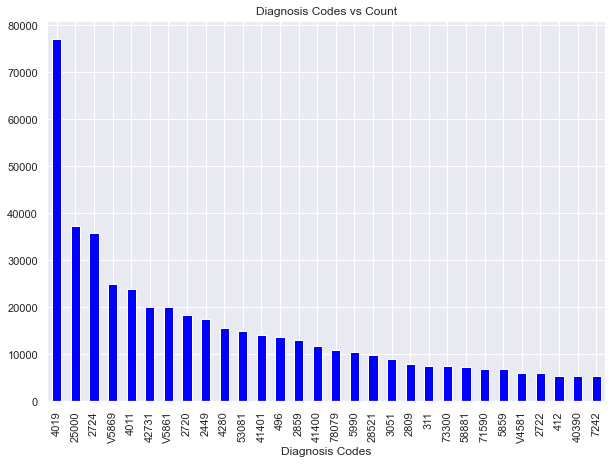

In [113]:
plt.figure(figsize=(10, 7))
patient_df['Diagnosis_data'].value_counts().head(30).plot(x=patient_df['Diagnosis_data'] , kind = 'bar' , color = 'blue')
plt.title('Diagnosis Codes vs Count')
plt.xlabel('Diagnosis Codes')
plt.show()

- Top 10 Diagnosis codes with their frequency of occurence are:
Code     Frequency
4019     77056
25000    37356
2724     35763
V5869    24904
4011     23773
42731    20138
V5861    20001
2720     18268
2449     17600
4280     15507

In [114]:
patient_df = pd.DataFrame(columns = ['Procedure_data'])
patient_df['Procedure_data'] = pd.concat([patient_data["ClmProcedureCode_1"],patient_data["ClmProcedureCode_2"],patient_data["ClmProcedureCode_3"],patient_data["ClmProcedureCode_4"],patient_data["ClmProcedureCode_5"],patient_data["ClmProcedureCode_6"]],axis=0)
patient_df = patient_df.dropna()

In [116]:
patient_df['Procedure_data'].value_counts().head(10)

4019.0    1959
9904.0    1152
2724.0    1054
8154.0    1022
66.0       901
3893.0     854
3995.0     809
4516.0     651
3722.0     589
8151.0     463
Name: Procedure_data, dtype: int64

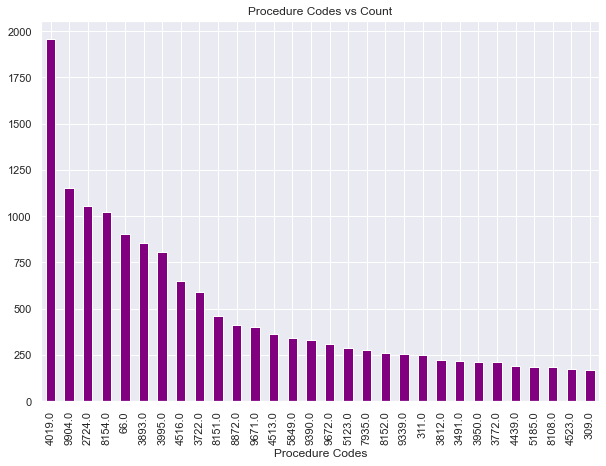

In [115]:
plt.figure(figsize=(10, 7))
patient_df['Procedure_data'].value_counts().head(30).plot(x=patient_df['Procedure_data'] , kind = 'bar' , color = 'purple')
plt.title('Procedure Codes vs Count')
plt.xlabel('Procedure Codes')
plt.show()

- Top 10 Procedure codes with their frequency of occurence are:
Code     Frequency
4019.0    1959
9904.0    1152
2724.0    1054
8154.0    1022
66.0       901
3893.0     854
3995.0     809
4516.0     651
3722.0     589
8151.0     463

# CONCLUSION

- From the Exploratory Data Analysis,the following observations were made:
   ->  There are less fraud claims in my data comapared to non fraud claims. 212796 Frauds and 345415 Non Frauds.
       For inpatients, the frauds are occuring sligtly more.Whereas for outpatients they are less in number.
       
   ->  Physicians who have attended more patients are more likely to commit fraud.
       The physicians with ids{PHY422134,PHY341560,PHY315112,PHY411541,PHY431177} have attended the most patients(inpatients).           
       The physicians with ids{PHY330576,PHY350277,PHY412132,PHY423534,PHY314027} have attended the most patients(outpatients).
       Attending_physician_count could be a very crucial feature therefore.
       
   ->  Operating_physician_count could also be a very crucial feature as the physicians who have operated on more patients are        likely doing more frauds.    
       Top 5 physicians with most operated cases for Inpatients;
       {PHY429430,PHY341560,PHY411541,PHY352941,PHY314410} 
       Top 5 physicians with most operated cases for Outpatients;  
       {PHY330576,PHY424897,PHY314027,PHY423534,PHY357120}
     
    -> There is a clear demarcation in determining the fact that top 20 providers whether for inpatients or outpatients have 
       all commited frauds.
       
    -> Unlike the provider or physician count, here there is no substancial clarity as to whether a beneficiary with more  
       claims  taken has done a fraud.This means this(Benef_count) is not a very good feature but surely will play some role.
       
    -> For beneficiaries(Inpatients) who have seeked more claims or have a higher count, are more likely to commit frauds.
       For beneficiaries(Outpatients) who have seeked more claims or have a higher count, there is no substaincial information 
       to conclude anything.
       
    -> 'Age' is not a useful feature considering the fact that no visible conclusions can be drawn from the boxplots.
        More/Less age is not a parameter to decide whether a fraud is likely to be commmited or not
        
    ->  For outpatients it is evident that mojority claims just took 1 day. Most of these were non frauds.
        From inpatients countplot it is evident that most claims took an average of 4 to 9 days with some of them being frauds         and rest non frauds.
        
    ->  Majority patients belong to race 1.
        Among Patients belonging to race 1,around 30k have not commited frauds and about 17k have commited frauds.
        So 'race' could be an important feature.
        
    ->  Top 5 states where people have submitted more claims are: States with codes {5,10,33,45,14}
        So it is evident that state 5 is more likely to have more fraud claims.
        
    ->  For Inpatients, a higher amount is reimbursed compared to outpatients.
        The reasoning being the fact that inpatients seek more claim due to their hospital expenditure.
        
    ->  The top 5 Procedure Codes are {4019.0,9904.0,2724.0,8154.0,66.0} and top 5 Diagnosis Codes are {4019,25000,2724,V5869,         4011}.
    